In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### DO NOTE

We are only plotting for Seasonals since data cleaning for seasons dropped all non-seasonals

In [25]:
# set categorical types
category_cols = ['Rating','Type','Status','Source','season']
int_cols = ['Rank','Episodes','Scored By','Popularity','Favorites','Members','Premier_Month']
float_cols = ['Score']

types = dict([(i,'category') for i in category_cols])

df = pd.read_csv('cleaned_data.csv')
df = df.astype(types)
df.dtypes

Unnamed: 0          int64
anime_id            int64
Name               object
English name       object
Other name         object
Score             float64
Genres             object
Synopsis           object
Type             category
Episodes            int64
Aired              object
Status           category
Producers          object
Licensors          object
Studios            object
Source           category
Duration           object
Rating           category
Rank                int64
Popularity          int64
Favorites           int64
Scored By           int64
Members             int64
Image URL          object
season           category
Premier_Month       int64
dtype: object

### Plotting the numerical data

For Premier Month: Months since 1900 that the show premiered in

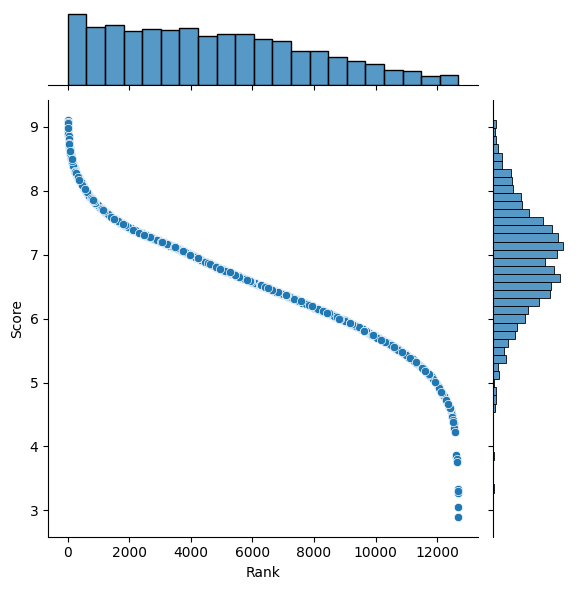

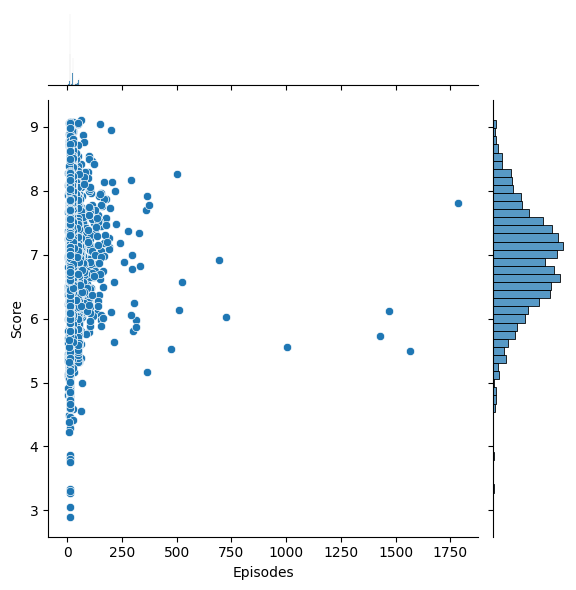

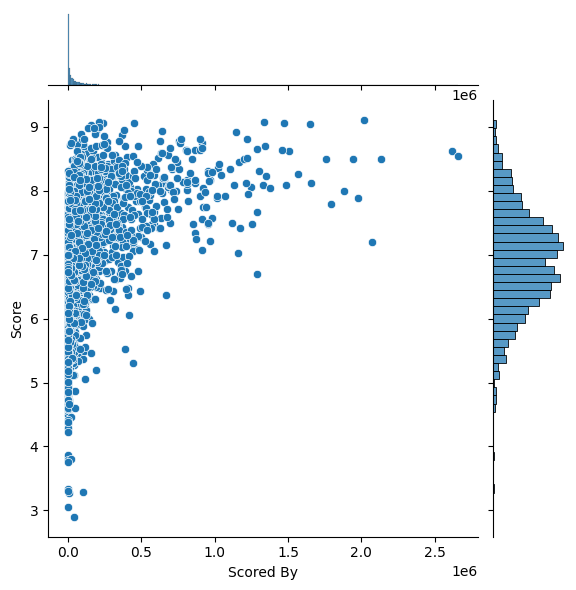

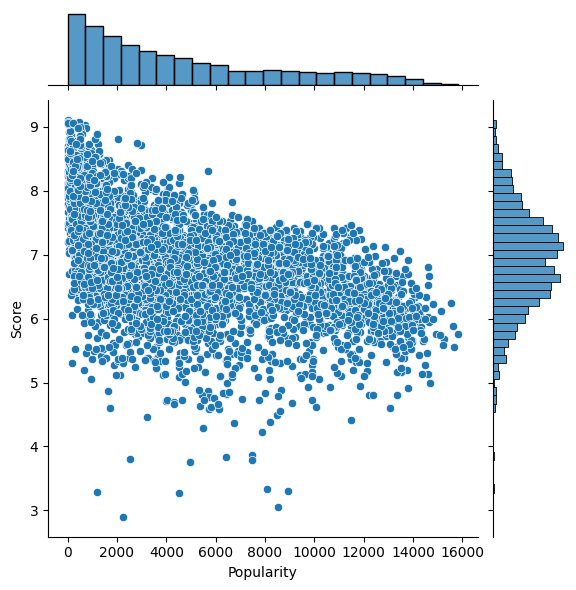

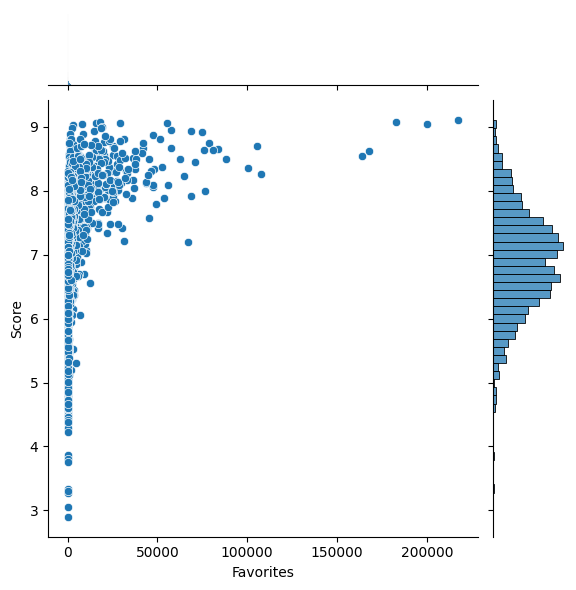

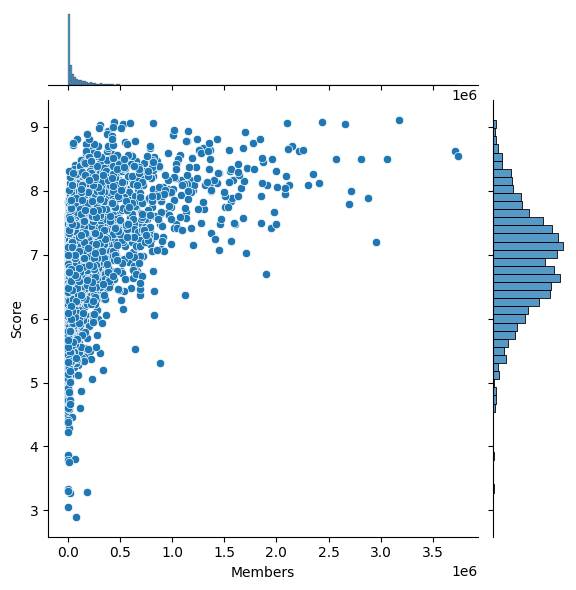

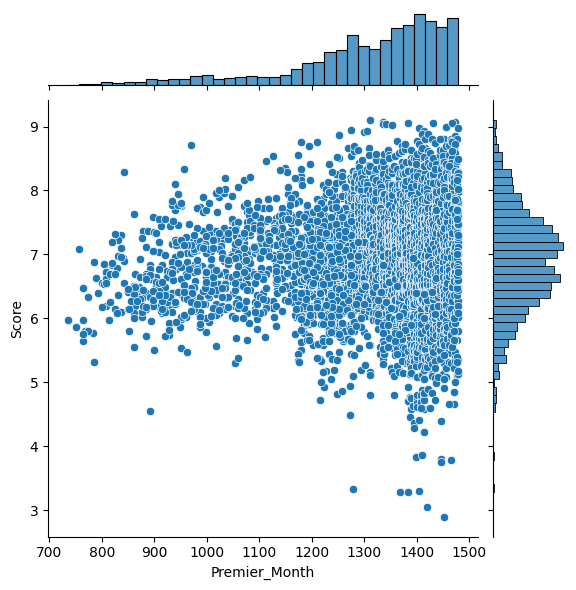

In [19]:
for y in int_cols:
    sb.jointplot(x=df[y],y=df['Score'])

### Split the df

In [26]:
# calculate number of datapoints for train set
def split_dataset(df:object, train_set_ratio:float):
    """splits a dataset, with the size of train_set being determined by train_set_ratio
    @param df: The dataframe to split
    @param train_set_ratio: Float between 0 and 1 to determine the ratio of the df to be the train_set
    @returns train_set: The train set
    @returns test_set: The test set"""

    # shuffle the data so we don't just take the first 20% as test set.
    df = df.sample(frac=1).reset_index(drop=True)

    # calculate the splits
    entry_count = len(df.index)
    train_count = (int)(entry_count*train_set_ratio)

    # split
    train_set = df[:train_count]
    test_set = df[train_count:]

    print(f'total: {entry_count}\ntrain: {train_set.shape}\ntest: {test_set.shape}')
    return train_set, test_set

train_set, test_set = split_dataset(df,0.8)

total: 4281
train: (3424, 26)
test: (857, 26)


### Linear Regression code yanked from Exercise 4

In [23]:
def linear_regression(x:str, y:str, train_set:object, test_set:object):
    """does linear regression of variable y in the dataset against x.
    @param x: The variable we want to predict
    @param y: The variable to perform regression on.
    @param train_set: The set used for training the model.
    @param test_set: The set used to test the model's accuracy.
    @returns R^2: The R^2 values of the model, train set then test set.
    @returns MSE: The MSE values of the model, train set then test set."""

    print(f'=============== {y} ===============')
    linreg = LinearRegression()
    linreg.fit(train_set[[y]],train_set[[x]])

    # print the intercept & coef in the form y = m*x + c
    print(f"""Line Equation
        {x} = {linreg.coef_}*{y} + {linreg.intercept_}
        """)

    datasets = {'train':train_set, 'test':test_set}
    results = {}

    r2_arr = []
    mse_arr = []
    
    for name,dataset in datasets.items():

        pred = linreg.predict(dataset[[y]])
        
        r2 = linreg.score(dataset[[y]], dataset[[x]])
        mse = mean_squared_error(dataset[[x]], pred)

        r2_arr.append(r2)
        mse_arr.append(mse)

        print(f"""{name} dataset
        R^2: {r2}
        MSE: {mse}
        """)
        results[name] = pred


    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(18, 9))
    axes[0].scatter(train_set[[x]], results['train'], color = "blue")
    axes[0].plot(train_set[[x]], train_set[[x]], linewidth = 1, color = 'black')
    axes[0].set_xlabel(f"True values of {x}")
    axes[0].set_ylabel(f"Predicted values of {x}")
    axes[1].scatter(test_set[[x]], results['test'], color = "green")
    axes[1].plot(test_set[[x]], test_set[[x]], linewidth = 1, color='black')
    axes[1].set_xlabel(f"True values of {x}")
    axes[1].set_ylabel(f"Predicted values of {x}")
    plt.show()
    return r2_arr, mse_arr

### Performing Linear Regression

For Premier Month: Months passed since 1900 

=============== Rank ===============
Line Equation
        Score = [[-0.00024657]]*Rank + [8.05670772]
        
train dataset
        R^2: 0.9563916627460815
        MSE: 0.027702164581499208
        
test dataset
        R^2: 0.9520071691760166
        MSE: 0.03211490952850395
        


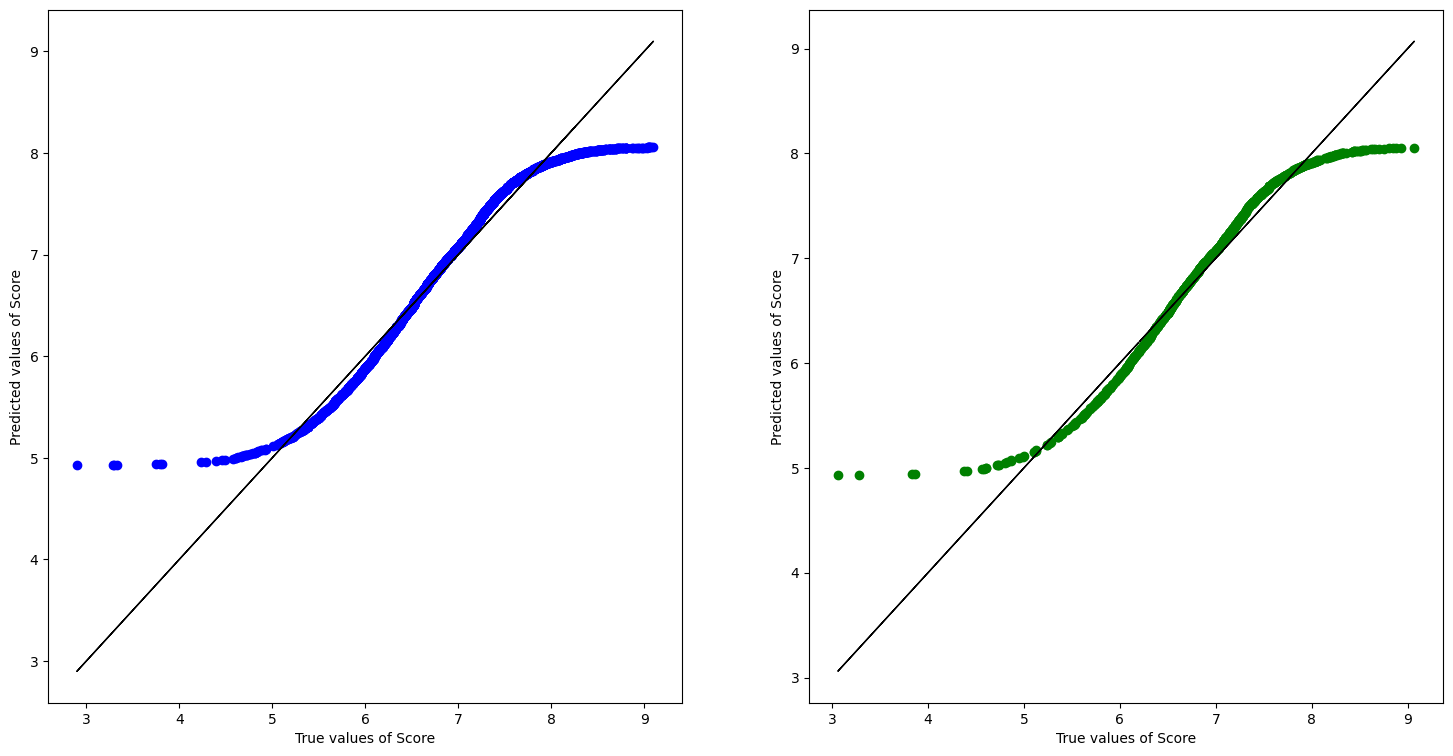

=============== Episodes ===============
Line Equation
        Score = [[-0.00015427]]*Episodes + [6.89716383]
        
train dataset
        R^2: 0.00016838575653166377
        MSE: 0.6351423070841739
        
test dataset
        R^2: -0.0009991175382089157
        MSE: 0.6698291295996457
        


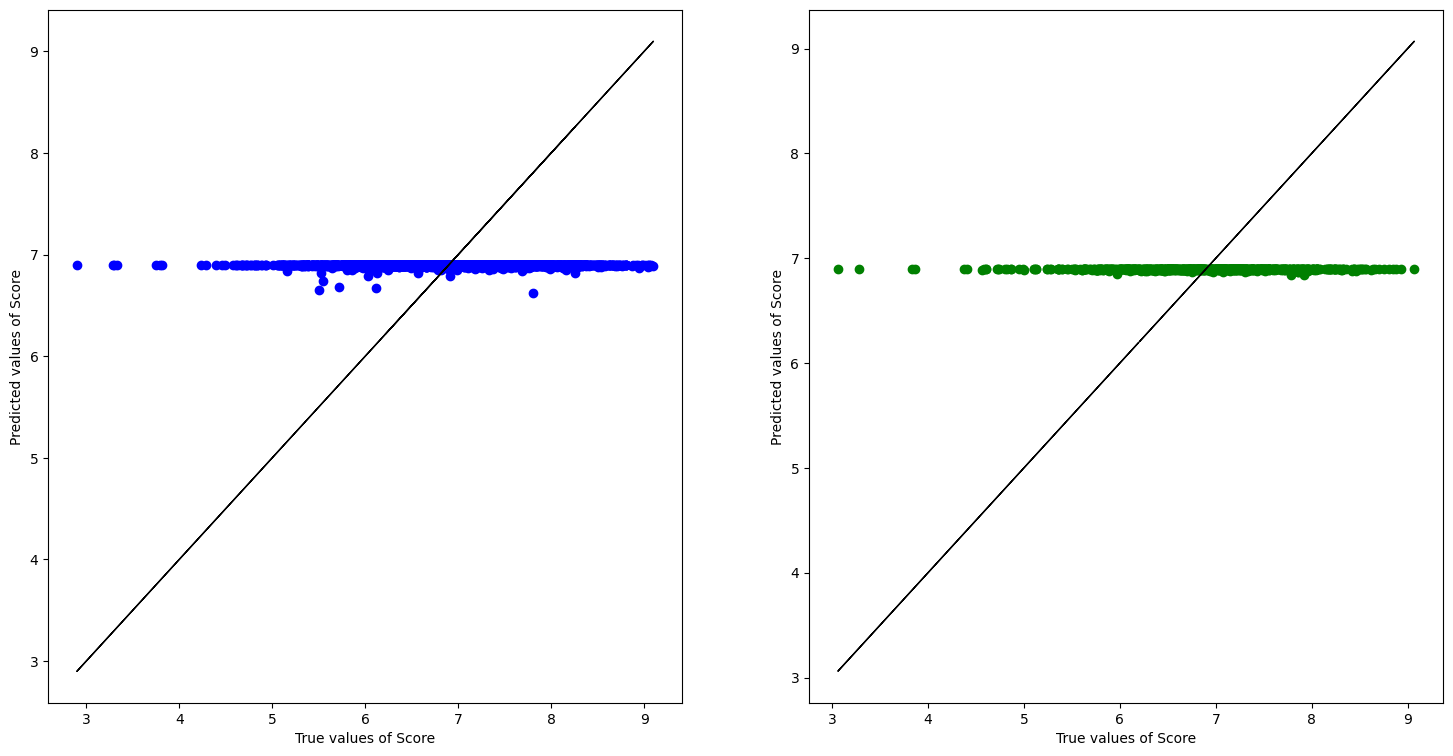

=============== Scored By ===============
Line Equation
        Score = [[1.65912615e-06]]*Scored By + [6.75608387]
        
train dataset
        R^2: 0.1710455106212141
        MSE: 0.5265927375683249
        
test dataset
        R^2: 0.1707641965112905
        MSE: 0.5548918942603397
        


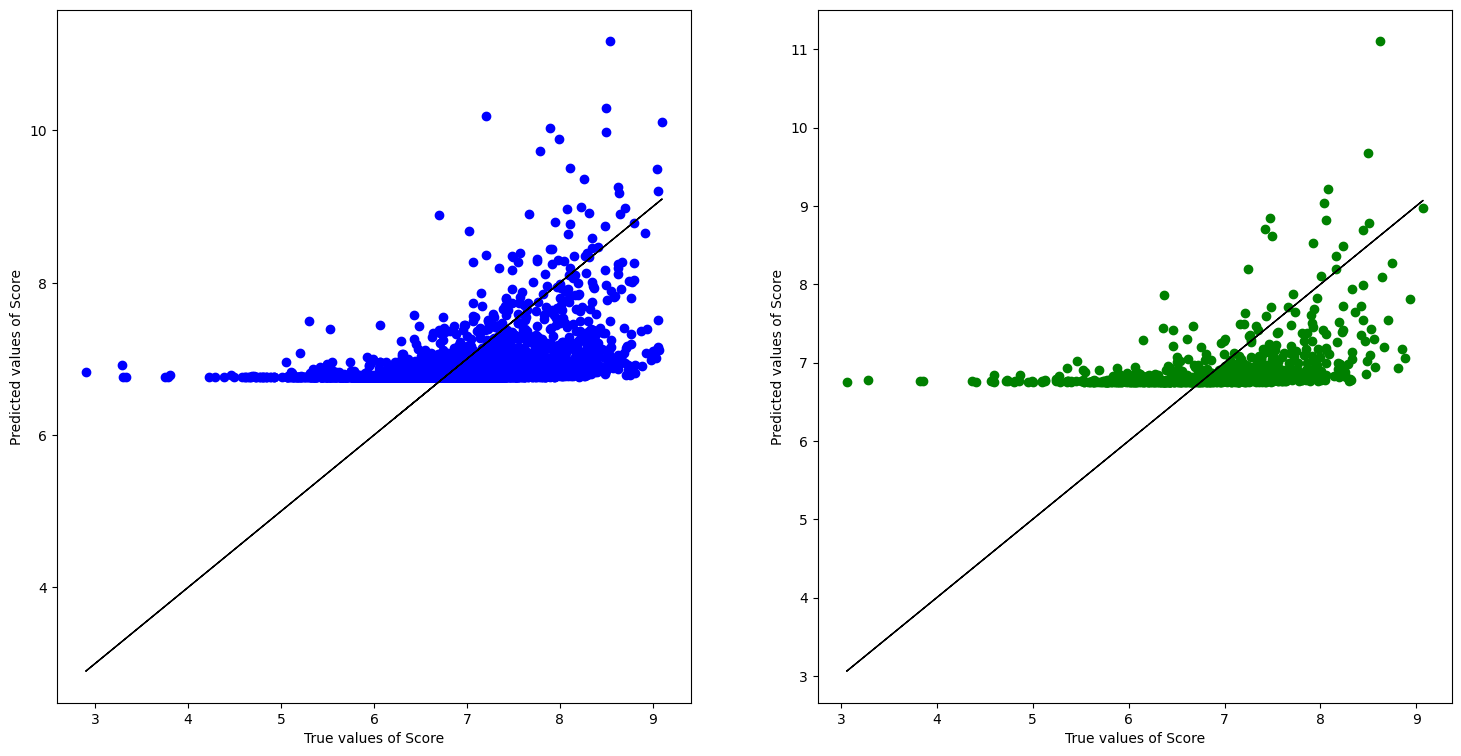

=============== Popularity ===============
Line Equation
        Score = [[-0.00010991]]*Popularity + [7.40148637]
        
train dataset
        R^2: 0.29772471277506907
        MSE: 0.4461198663674456
        
test dataset
        R^2: 0.2696499215372856
        MSE: 0.48872146717056364
        


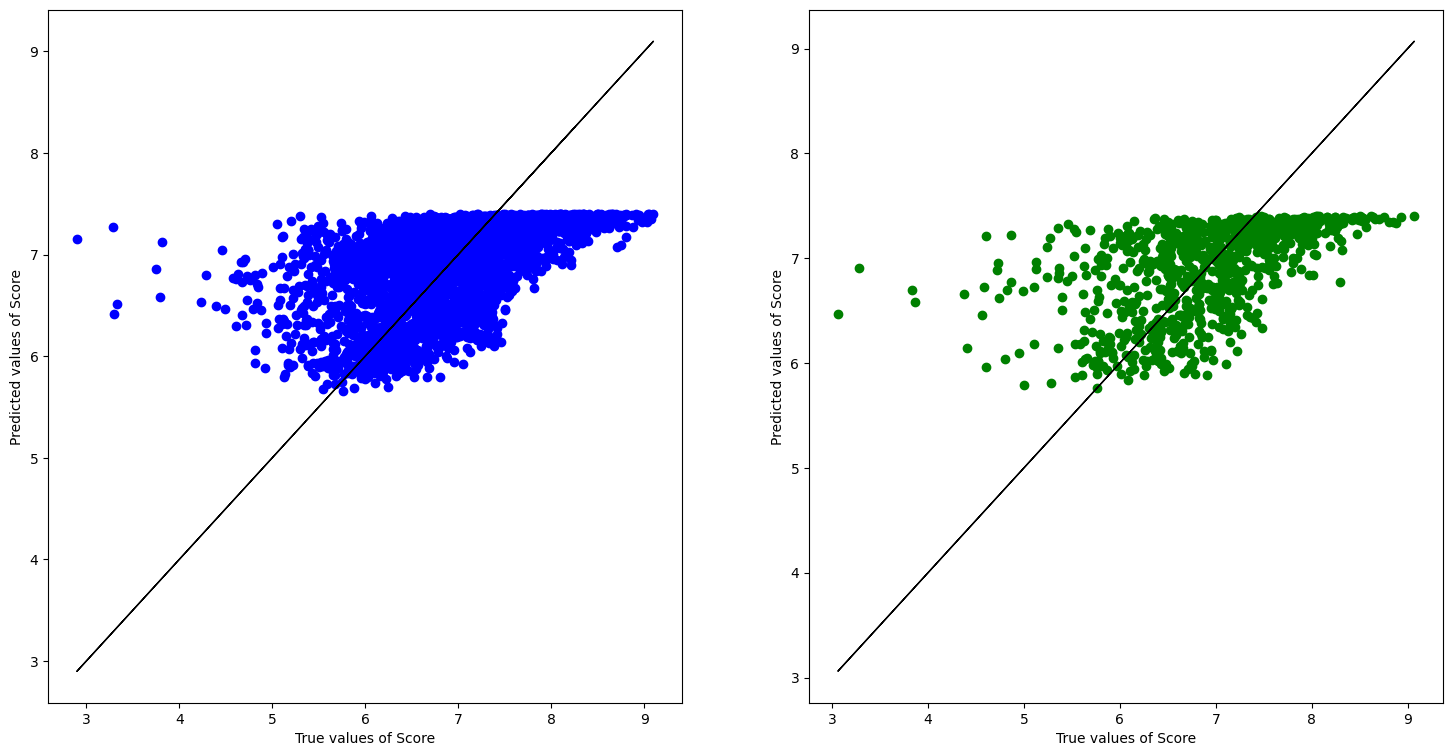

=============== Favorites ===============
Line Equation
        Score = [[3.0107909e-05]]*Favorites + [6.82931832]
        
train dataset
        R^2: 0.12165646221032411
        MSE: 0.5579670947155735
        
test dataset
        R^2: 0.11089374299161903
        MSE: 0.5949548404379988
        


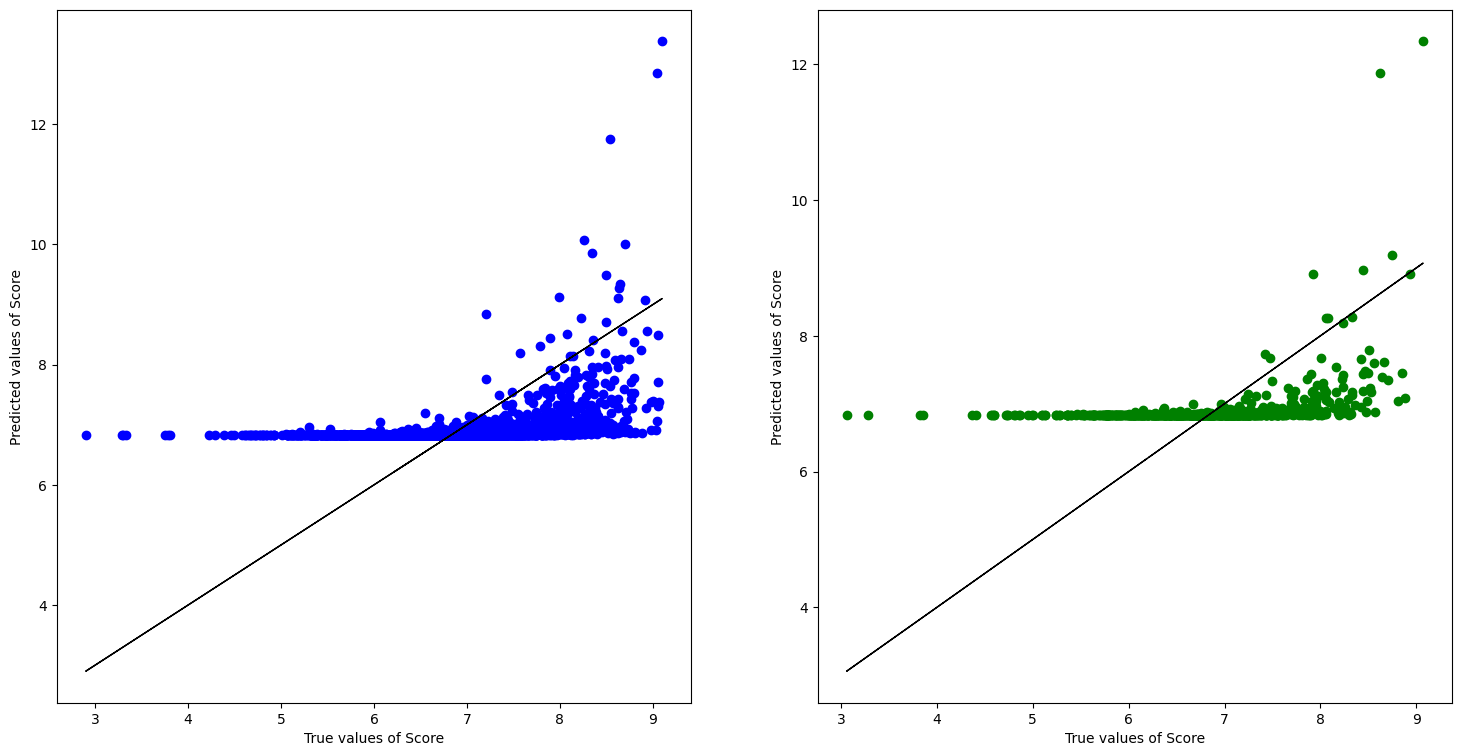

=============== Members ===============
Line Equation
        Score = [[1.11974215e-06]]*Members + [6.71366329]
        
train dataset
        R^2: 0.20865094235573312
        MSE: 0.5027039143599975
        
test dataset
        R^2: 0.2028139331562233
        MSE: 0.5334454745536272
        


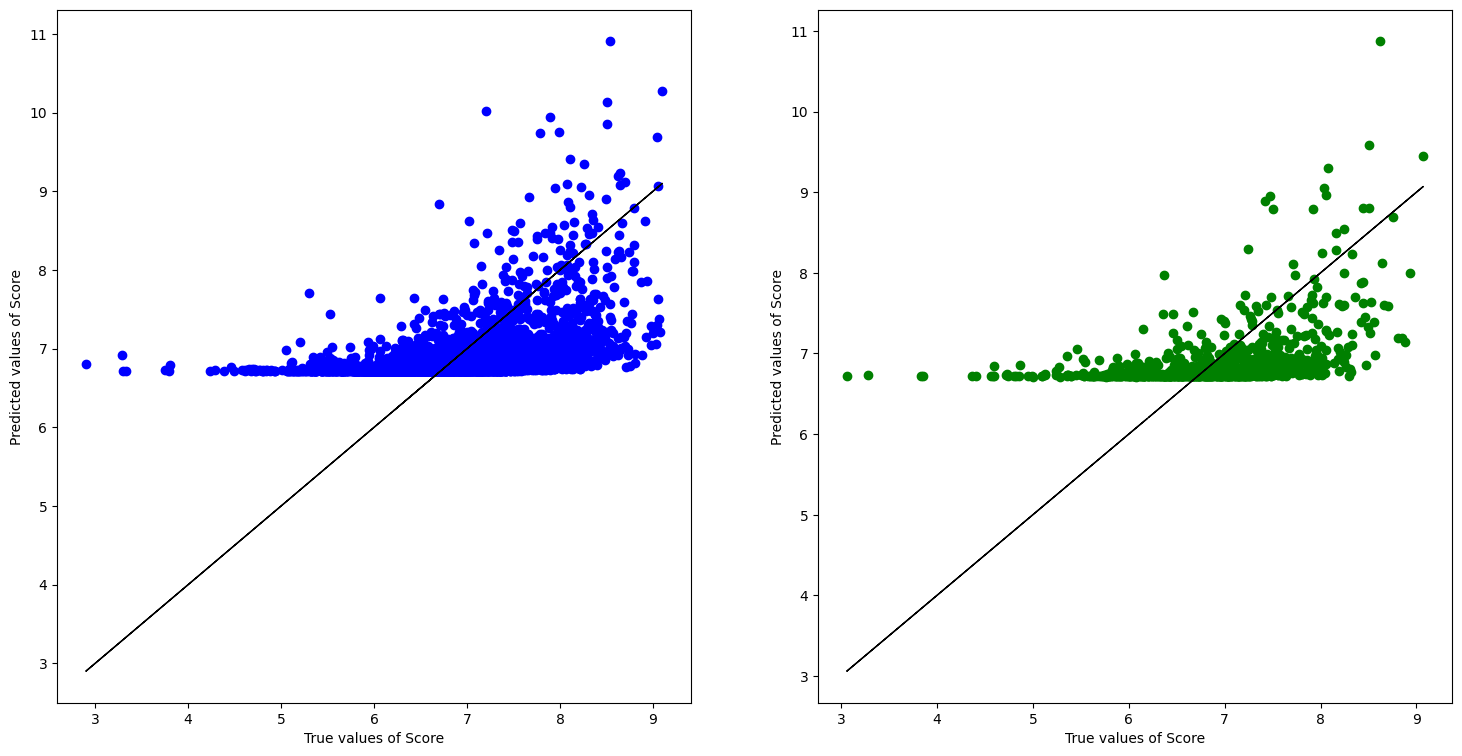

=============== Premier_Month ===============
Line Equation
        Score = [[0.00029667]]*Premier_Month + [6.50628608]
        
train dataset
        R^2: 0.00305803800902793
        MSE: 0.6333066575886234
        
test dataset
        R^2: 0.003502368420432833
        MSE: 0.6668169127367602
        


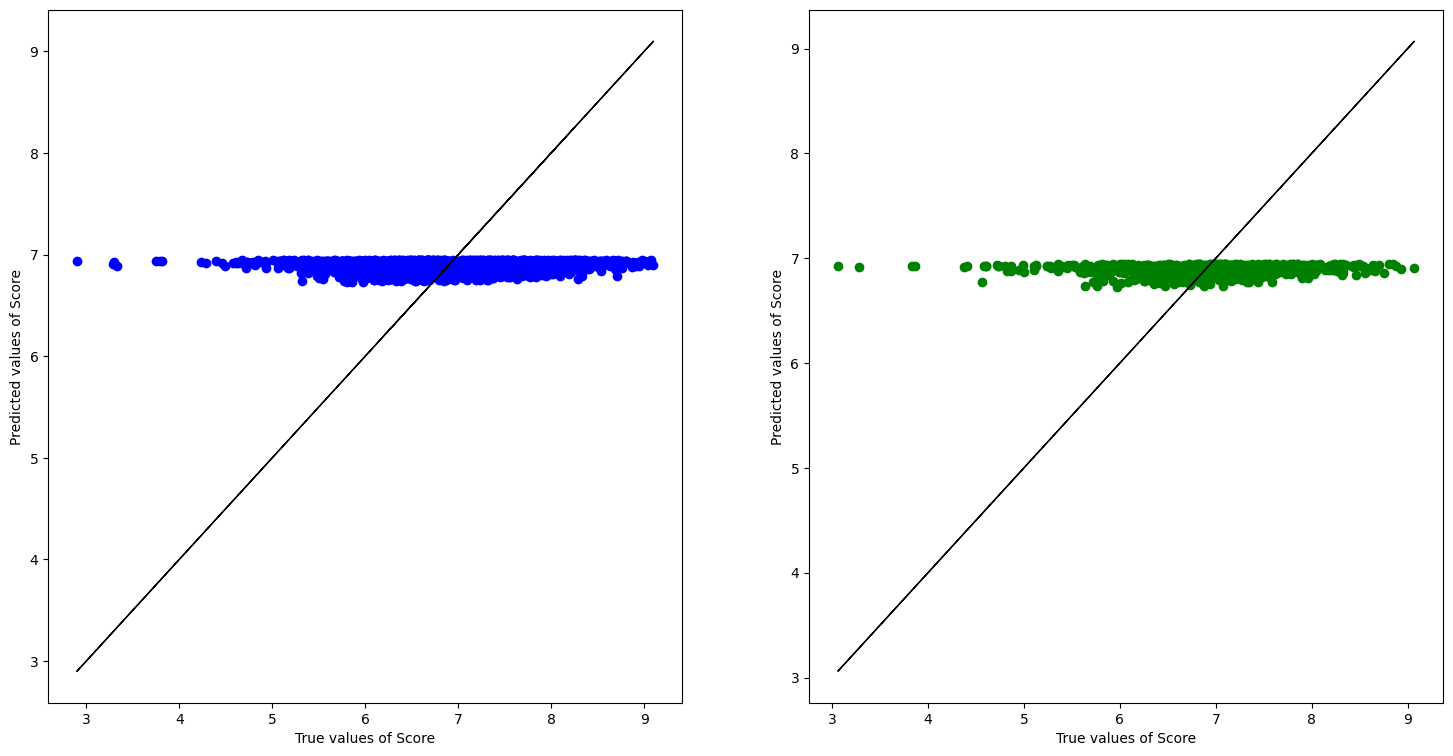

Rank regression
0 dataset
        R^2: 0.9563916627460815
        MSE: 0.027702164581499208
        
1 dataset
        R^2: 0.9520071691760166
        MSE: 0.03211490952850395
        
Episodes regression
0 dataset
        R^2: 0.00016838575653166377
        MSE: 0.6351423070841739
        
1 dataset
        R^2: -0.0009991175382089157
        MSE: 0.6698291295996457
        
Scored By regression
0 dataset
        R^2: 0.1710455106212141
        MSE: 0.5265927375683249
        
1 dataset
        R^2: 0.1707641965112905
        MSE: 0.5548918942603397
        
Popularity regression
0 dataset
        R^2: 0.29772471277506907
        MSE: 0.4461198663674456
        
1 dataset
        R^2: 0.2696499215372856
        MSE: 0.48872146717056364
        
Favorites regression
0 dataset
        R^2: 0.12165646221032411
        MSE: 0.5579670947155735
        
1 dataset
        R^2: 0.11089374299161903
        MSE: 0.5949548404379988
        
Members regression
0 dataset
        R^2: 0.20865094235

In [24]:
regs = dict([(y , {}) for y in int_cols])
for y in int_cols:
    regs[y]['r2'], regs[y]['mse'] = linear_regression('Score',y,train_set=train_set, test_set=test_set)

for name, res in regs.items():
    print(f"{name} regression")
    for i in range(len(res['r2'])):
        print(f"""{i} dataset
        R^2: {res['r2'][i]}
        MSE: {res['mse'][i]}
        """)


### Categorical Data

For seasons:

    0: Winter
    1: Spring
    2: Summer
    3: Autumn

In [27]:
def plot_categories(x,y):
    """plot the boxplot of x against y, as well as the countplot of y.
    @param x: The variable to be investigated
    @param y: The categorical data"""
    print(f'=============== {y} ===============')
    df2 = df[[y, x]].astype({y:'category'}) # need to set variable as category
    cats = df2[y].cat.categories
    sb.countplot(data=df2[y])
    plt.show()
    print(f'categories: {len(cats)}')
    
    sb.boxplot(data=df2, x=x,y=y,orient='h')
    plt.show()

=============== Rating ===============


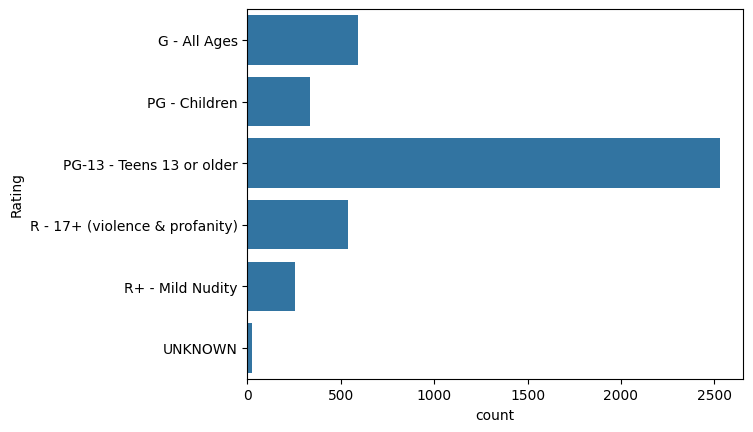

categories: 6


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


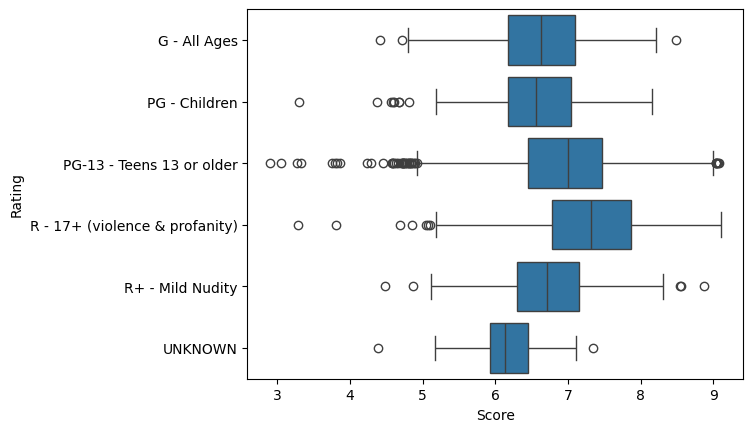

=============== Type ===============


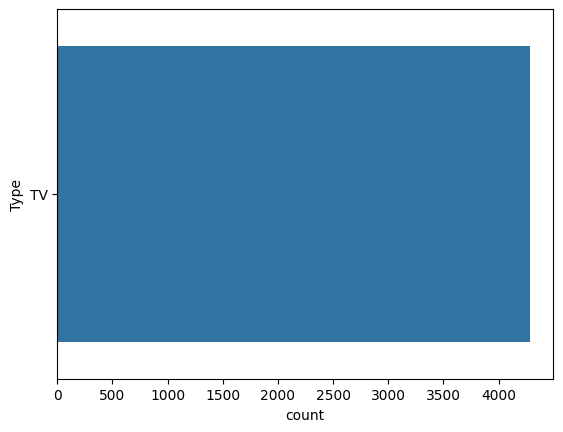

categories: 1


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


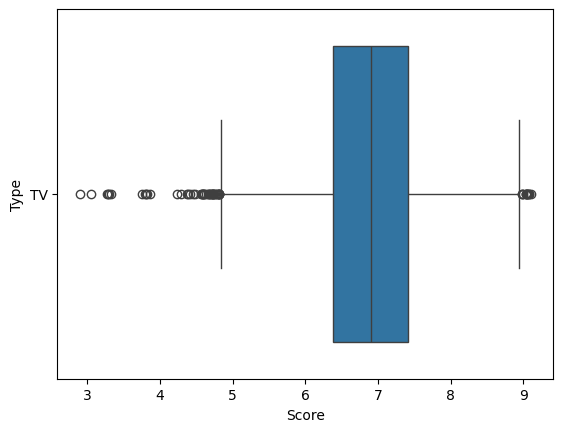

=============== Status ===============


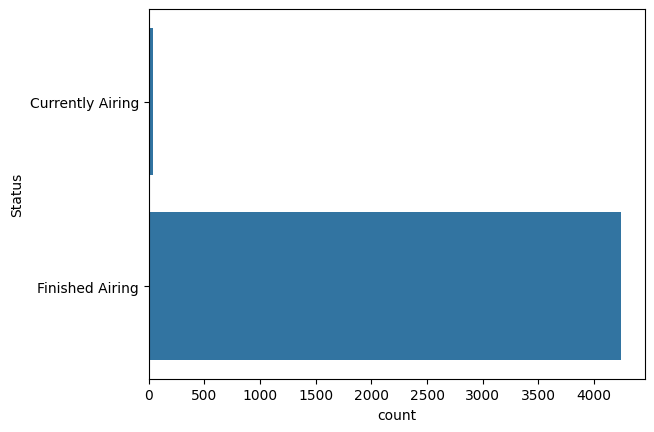

categories: 2


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


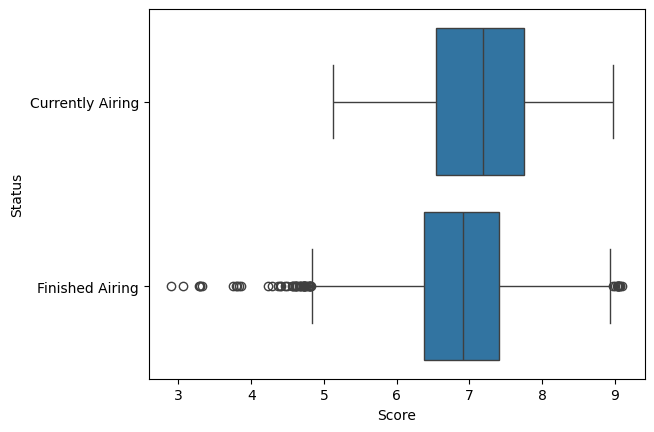

=============== Source ===============


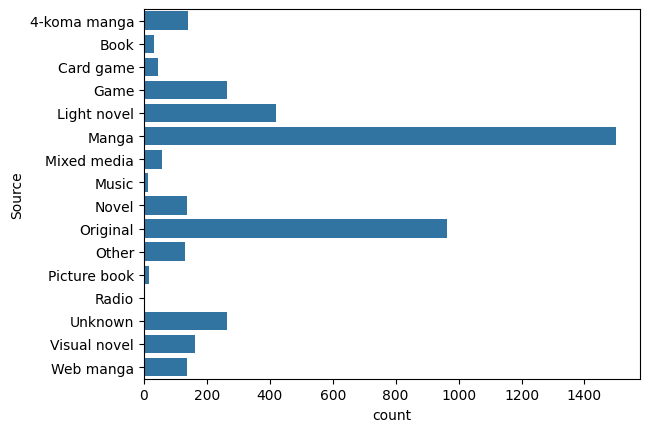

categories: 16


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


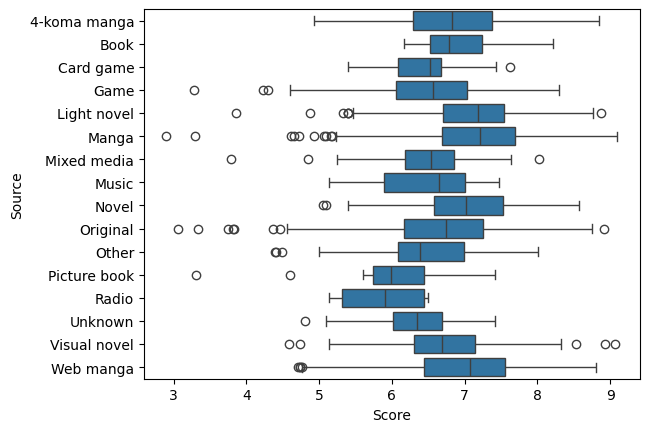

=============== season ===============


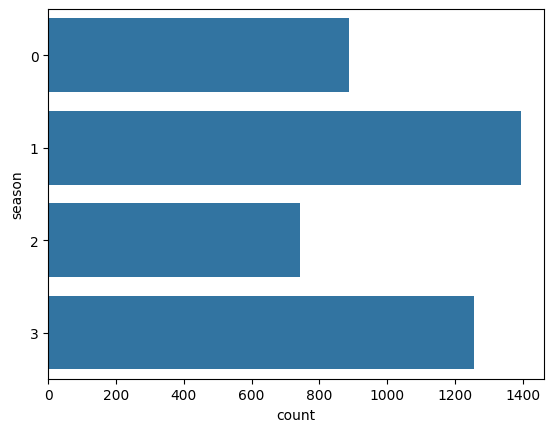

categories: 4


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


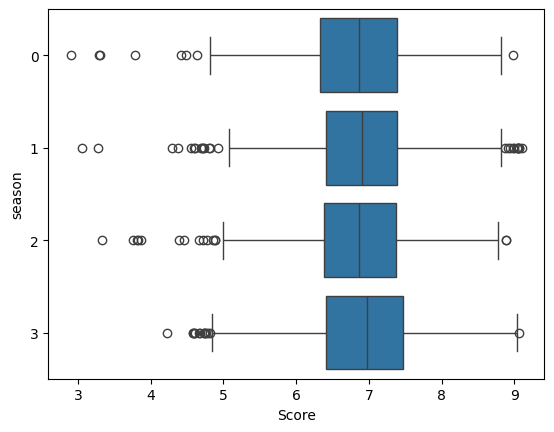

In [28]:
for y in category_cols:
    plot_categories('Score',y)